In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [3]:
def get_data(file_path: str) -> tuple[np.ndarray, np.ndarray]:
    with open(file_path, "r") as f:
        lines = f.readlines()
    x = []
    y = []
    for line in lines:
        x.append(float(line.split()[0]))
        y.append(float(line.split()[1]))
    return (np.array(x), np.array(y))


def prepare_data(
    x_data: np.ndarray, y_data: np.ndarray, test_size: float = 0.2
) -> tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
    x_data = x_data.reshape(-1, 1)
    y_data = y_data.reshape(-1, 1)
    x_scaler = MinMaxScaler()
    y_scaler = MinMaxScaler()
    x_data = x_scaler.fit_transform(x_data)
    y_data = y_scaler.fit_transform(y_data)
    x_train, x_test, y_train, y_test = train_test_split(
        x_data, y_data, test_size=test_size
    )
    return (x_train, x_test, y_train, y_test)

In [4]:
x_data, y_data = get_data("data/dane4.txt")
x_train, x_test, y_train, y_test = prepare_data(x_data, y_data)

In [12]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(1,)))
model.add(tf.keras.layers.Dense(20, input_shape=(1,), activation="relu"))
model.add(tf.keras.layers.Dense(1))

model.summary()
model.compile(optimizer="adam", loss="mean_squared_error")

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 20)                40        
                                                                 
 dense_4 (Dense)             (None, 1)                 21        
                                                                 
Total params: 61 (244.00 Byte)
Trainable params: 61 (244.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', min_delta=0.00001, patience=100, verbose=0, mode='auto')
history = model.fit(x_train, y_train, epochs=10_000, callbacks=[early_stopping], verbose=0)

1/1 [==============================] - 0s 19ms/step


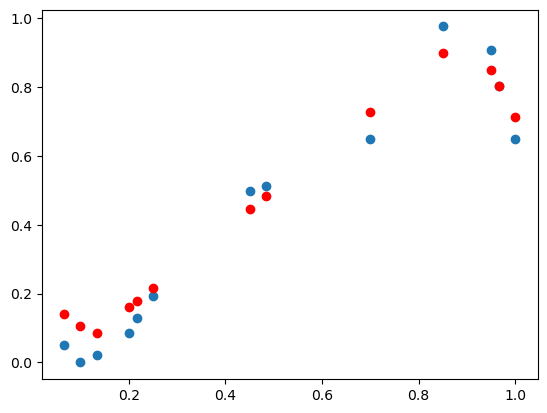

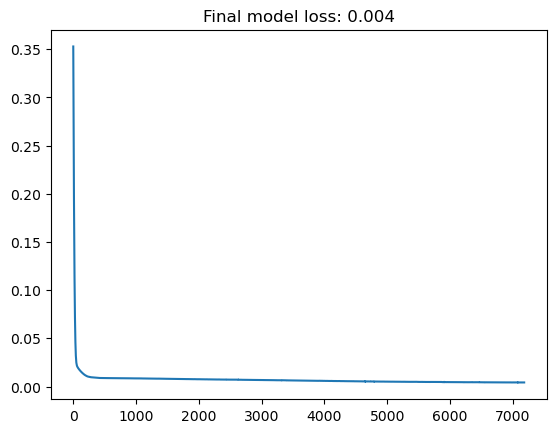

In [15]:
y_pred = model.predict(x_test)

plt.scatter(x_test, y_test)
plt.scatter(x_test, y_pred, color="red")
plt.show()

plt.plot(history.history["loss"])
plt.title(f"Final model loss: {history.history['loss'][-1]:.3f}")
plt.show()